# Code Section

### we install imbalanced-learn for the oversampling method which will be used later in the notebook

In [1]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### The necessay libraries and the MERGEDDATASETS(1) are loaded 

In [2]:
# import necessary modules 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 

# load the data set 
data = pd.read_csv('MERGEDDATASETS (1).csv') 

# print info about columns in the dataframe 
print(data.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10215 entries, 0 to 10214
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_BUREAU                 10215 non-null  int64  
 1   MONTHS_BALANCE               10215 non-null  float64
 2   STATUS                       10215 non-null  float64
 3   SK_ID_CURR                   10215 non-null  int64  
 4   TARGET                       10215 non-null  int64  
 5   NAME_CONTRACT_TYPE           10215 non-null  object 
 6   CODE_GENDER                  10215 non-null  object 
 7   FLAG_OWN_CAR                 10215 non-null  object 
 8   FLAG_OWN_REALTY              10215 non-null  object 
 9   CNT_CHILDREN                 10215 non-null  int64  
 10  AMT_INCOME_TOTAL             10215 non-null  float64
 11  AMT_CREDIT                   10215 non-null  float64
 12  NAME_INCOME_TYPE             10215 non-null  object 
 13  NAME_EDUCATION_T

### Label Encoding of the whole dataset

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

5 columns were label encoded.


### One-Hot Encoding

In [5]:
data = pd.get_dummies(data)
print('Training Features shape: ', data.shape)

Training Features shape:  (10215, 162)


In [6]:
# To get the total number of '0' and '1' in the dataset
data['TARGET'].value_counts()

TARGET
0    9363
1     852
Name: count, dtype: int64

### Now we split the entire dataset into training and testing parts for the diffrent models

In [7]:
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != 'TARGET']
y = data.TARGET
class_names = data.TARGET

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 0)

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7150, 161)
Number transactions y_train dataset:  (7150,)
Number transactions X_test dataset:  (3065, 161)
Number transactions y_test dataset:  (3065,)


In [8]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7150 entries, 3766 to 2732
Columns: 161 entries, SK_ID_BUREAU to CREDIT_TYPE_Unknown type of loan
dtypes: bool(98), float64(30), int64(33)
memory usage: 4.2 MB
None


In [9]:
# logistic regression object 
lr = LogisticRegression() 

# train the model on train set 
lr.fit(X_train, y_train.ravel()) 

predictions = lr.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2820
           1       0.00      0.00      0.00       245

    accuracy                           0.92      3065
   macro avg       0.46      0.50      0.48      3065
weighted avg       0.85      0.92      0.88      3065



/home/u213926/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/u213926/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u213926/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

### The above is the result of Logistic Regression done on the dataset before oversampling

In [10]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 607
Before OverSampling, counts of label '0': 6543 



### Here it is clear that the dataset is biased towards to '0'. Hence we oversample the 'train' part of the train_test_split as it is important to hava a equal dataset for training purpose. 

In [11]:
 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


After OverSampling, the shape of train_X: (13086, 161)
After OverSampling, the shape of train_y: (13086,) 

After OverSampling, counts of label '1': 6543
After OverSampling, counts of label '0': 6543


### For the oversampling we use the method 'SMOTE'. After the oversampling we can see that there are equal number of label '1' and label '0'

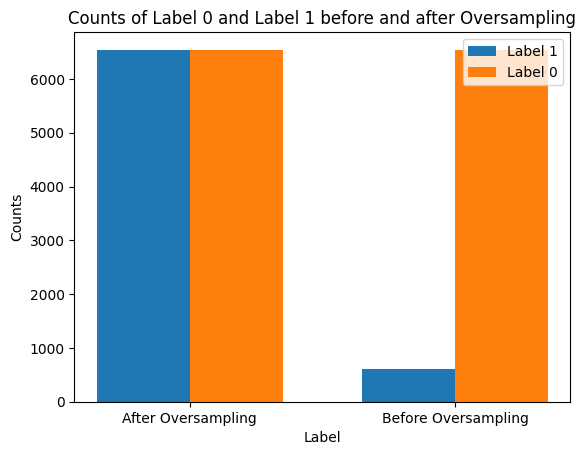

In [12]:
import matplotlib.pyplot as plt

# Data before oversampling
before_oversampling = [sum(y_train == 0), sum(y_train == 1)]

# Data after oversampling
after_oversampling = [sum(y_train_res == 0), sum(y_train_res == 1)]

# Labels for the bars
labels = ['After Oversampling', 'Before Oversampling']

# Bar width
bar_width = 0.35

# Index for the bars
index = range(len(labels))

# Plotting the data
plt.bar(index, before_oversampling, bar_width, label='Label 1')
plt.bar([i + bar_width for i in index], after_oversampling, bar_width, label='Label 0')

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Counts of Label 0 and Label 1 before and after Oversampling')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()

# Displaying the plot
plt.show()


### The above graph shows the value difference between before oversampling and after oversampling

### Now we try out different models and their respective results are produced

In [13]:
from sklearn import svm
from sklearn.metrics import classification_report
import time

# Start the timer
start_time = time.time()

svc = svm.SVC(kernel='sigmoid', gamma='auto', probability=True).fit(X_train_res, y_train_res)

# End the timer after training
training_time = time.time() - start_time
print("Training time: %.2f seconds" % training_time)

# Start the timer for predictions
start_time = time.time()

predictions = svc.predict(X_test)

# End the timer after making predictions
prediction_time = time.time() - start_time
print("Prediction time: %.2f seconds" % prediction_time)

# Print classification report
print(classification_report(y_test, predictions))


Training time: 80.95 seconds
Prediction time: 2.98 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2820
           1       0.08      1.00      0.15       245

    accuracy                           0.08      3065
   macro avg       0.04      0.50      0.07      3065
weighted avg       0.01      0.08      0.01      3065



/home/u213926/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u213926/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u213926/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import time

# Start the timer
start_time = time.time()

nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

# End the timer after training
training_time = time.time() - start_time
print("Training time: %.2f seconds" % training_time)

# Start the timer for predictions
start_time = time.time()

predictions = nb.predict(X_test)

# End the timer after making predictions
prediction_time = time.time() - start_time
print("Prediction time: %.2f seconds" % prediction_time)

# Print classification report
print(classification_report(y_test, predictions))


Training time: 0.06 seconds
Prediction time: 0.13 seconds
              precision    recall  f1-score   support

           0       0.95      0.18      0.31      2820
           1       0.09      0.90      0.16       245

    accuracy                           0.24      3065
   macro avg       0.52      0.54      0.23      3065
weighted avg       0.88      0.24      0.30      3065



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time

# Start the timer
start_time = time.time()

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res.ravel())

# End the timer after training
training_time = time.time() - start_time
print("Training time: %.2f seconds" % training_time)

# Start the timer for predictions
start_time = time.time()

predictions = lr.predict(X_test)

# End the timer after making predictions
prediction_time = time.time() - start_time
print("Prediction time: %.2f seconds" % prediction_time)

# Print classification report
print(classification_report(y_test, predictions))


Training time: 1.42 seconds
Prediction time: 0.00 seconds
              precision    recall  f1-score   support

           0       0.94      0.52      0.66      2820
           1       0.10      0.60      0.17       245

    accuracy                           0.52      3065
   macro avg       0.52      0.56      0.42      3065
weighted avg       0.87      0.52      0.63      3065



/home/u213926/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import time

# Start the timer
start_time = time.time()

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_res, y_train_res.ravel())

# End the timer after training
training_time = time.time() - start_time
print("Training time: %.2f seconds" % training_time)

# Start the timer for predictions
start_time = time.time()

predictions = clf.predict(X_test)

# End the timer after making predictions
prediction_time = time.time() - start_time
print("Prediction time: %.2f seconds" % prediction_time)

# Print classification report
print(classification_report(y_test, predictions))


Training time: 0.45 seconds
Prediction time: 0.00 seconds
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2820
           1       0.16      0.25      0.20       245

    accuracy                           0.83      3065
   macro avg       0.55      0.57      0.55      3065
weighted avg       0.87      0.83      0.85      3065



In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
import time

# Start the timer
start_time = time.time()

pac = PassiveAggressiveClassifier(max_iter=100, random_state=42)
pac.fit(X_train_res, y_train_res)

# End the timer after training
training_time = time.time() - start_time
print("Training time: %.2f seconds" % training_time)

# Start the timer for predictions
start_time = time.time()

predictions = pac.predict(X_test)

# End the timer after making predictions
prediction_time = time.time() - start_time
print("Prediction time: %.2f seconds" % prediction_time)

# Print classification report
print(classification_report(y_test, predictions))


Training time: 0.11 seconds
Prediction time: 0.00 seconds
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2820
           1       0.00      0.00      0.00       245

    accuracy                           0.92      3065
   macro avg       0.46      0.50      0.48      3065
weighted avg       0.85      0.92      0.88      3065



/home/u213926/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u213926/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/u213926/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import time

# Start the timer
start_time = time.time()

# Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# Train the model
rfc.fit(X_train_res, y_train_res)

# End the timer after training
training_time = time.time() - start_time
print("Training time: %.2f seconds" % training_time)

# Start the timer for predictions
start_time = time.time()

# Use the trained classifier for predictions
predictions = rfc.predict(X_test)

# End the timer after making predictions
prediction_time = time.time() - start_time
print("Prediction time: %.2f seconds" % prediction_time)

# Print classification report
print(classification_report(y_test, predictions))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s


Training time: 0.54 seconds
Prediction time: 0.05 seconds
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2820
           1       0.91      0.12      0.21       245

    accuracy                           0.93      3065
   macro avg       0.92      0.56      0.59      3065
weighted avg       0.93      0.93      0.90      3065



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


### After implementing the above models SVM performed the least with accuracy of 8% and took a time of apporx 83 sec. Random forest was the best model in terms of accuracy which had an accuracy of 93% and appox took 0.6 sec. But Interestingly Passive aggressive model came close with an accuracy of 92% and just took a time apporx 0.11 sec. Hence for the deployment we can say that passive aggressive is the best method